In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
if os.getcwd().split("/")[-1] != "XMutant-MNIST":
    os.chdir("../")
csv_mnist = os.path.join("result", 'csv_folder', "cumulative_misclassified_all.csv")
print(os.getcwd())

print(os.path.exists(csv_mnist))
csv_sdc = os.path.join("./../XMutant-LK-ADS","results", 'csvs', "cumulative_failure.csv")
print(csv_sdc)
print(os.path.exists(csv_sdc))


/home/xchen/Projects/XMutant/XMutant-MNIST
True
./../XMutant-LK-ADS/results/csvs/cumulative_failure.csv
True


Index(['Unnamed: 0', 'RANDOM random', 'XAI attention_opposite FSC',
       'XAI attention_opposite GC', 'XAI attention_opposite IG',
       'XAI attention_opposite SM', 'XAI attention_same FSC',
       'XAI attention_same GC', 'XAI attention_same IG',
       'XAI attention_same SM', 'XAI random FSC', 'XAI random GC',
       'XAI random IG', 'XAI random SM'],
      dtype='object')


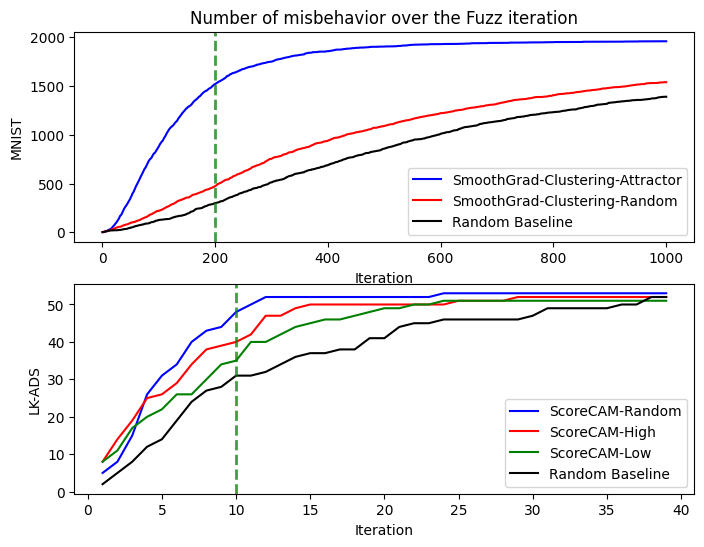

In [43]:
df_mnist = pd.read_csv(csv_mnist)
cols_mnist = ["C_C_sm", "C_R_sm", "R_R"]
df_sdc = pd.read_csv(csv_sdc)
cols_sdc = ["XAI random FSC", "XAI attention_same FSC","XAI attention_opposite FSC", "RANDOM random"]
print(df_sdc.keys())

fig, axs = plt.subplots(2,1, figsize=(8,6))
axs[0].set_title("Number of misbehavior over the Fuzz iteration")
df_mnist.plot(ax = axs[0], x="idx", y=cols_mnist, style=['b-','r-','k-'])
axs[0].legend(["SmoothGrad-Clustering-Attractor", "SmoothGrad-Clustering-Random", "Random Baseline"])
axs[0].set_ylabel("MNIST")
axs[0].set_xlabel("Iteration")
axs[0].axvline(200, color="g", ls="--", lw=2, alpha=0.75)
df_sdc.plot(ax = axs[1], x="Unnamed: 0", y=cols_sdc , style=['b-','r-','g-','k-'])
axs[1].set_xlabel("Iteration")
axs[1].legend(["ScoreCAM-Random", "ScoreCAM-High", "ScoreCAM-Low","Random Baseline"])
axs[1].set_ylabel("LK-ADS")
axs[1].axvline(10, color="g", ls="--", lw=2, alpha=0.75)
plt.savefig("line-plot-both.svg")